# Music Reviews: A Look at Numeric Scores

## Intro
This report will look at several music review publishers. What music do they focus on? Although they both use a 0-10 numeric scoring system, does one give higher average marks? What does the scores of albums included on the "Best New Music" list look like?

## Description of Data

For this report I will import a set of records describing music reviews by Anthony Fantano obtained from Kaggle [here](https://www.kaggle.com/jaredarcilla/anthony-fantano-reviews), and a set of music review scores from Pitchfork Music, also obtained from Kaggle, [here](https://www.kaggle.com/nolanbconaway/pitchfork-data). Anthony Fantano is an independant music reviewer who uploads his reviews to Youtube as [theneedledrop](https://www.youtube.com/theneedledrop), which is where the data was originally obtained (not by me). [Pitchfork](https://pitchfork.com) is a music news and reviews publication, part of Condé Nast. 

The aspects of the data I will be focusing on are the review scores for albums. Both score albums on a 0-10 scale, with 10 as the best.

In [1]:
#importing modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import sqlite3

## Importing and Cleaning Data

### Fantano Reviews

In [2]:
#loading first dataset
fantano_reviewdf = pd.read_csv('C:/Users/User/Documents/Github/thinkful_notes/music_caps/fantano_reviews.csv', encoding='latin_1')

In [3]:
#remove nulls
fantano_reviewdf = fantano_reviewdf[fantano_reviewdf['score'].notnull()]
fantano_reviewdf.head(3)

,Unnamed: 0,title,artist,review_date,review_type,score,word_score,best_tracks,worst_track,link
0,0,Cosmogramma,Flying Lotus,2010-05-05,Album,8.0,NaN,[],NaN,https://www.youtube.com/watch?v=KCuamde9Atc
1,1,Throat,Little Women,2010-05-09,Album,9.0,NaN,[],NaN,https://www.youtube.com/watch?v=cndwH6byJnk
2,2,Latin,Holy Fuck,2010-05-10,Album,7.0,NaN,[],NaN,https://www.youtube.com/watch?v=ySXryTlo9Ac


### Loading Pitchfork Dataset

In [4]:
#load pitchfork database
conn = sqlite3.connect('C:/Users/User/Documents/Github/thinkful_notes/music_caps/pf_database.sqlite')
c = conn.cursor()

In [5]:
#read pf reviews into a dataframe
pf_reviews_df = pd.read_sql('SELECT reviewid, title, artist ,score, best_new_music FROM reviews', conn)

In [6]:
#check data is in dataframe
pf_reviews_df.head(4)

,reviewid,title,artist,score,best_new_music
0,22703,mezzanine,massive attack,9.3,0
1,22721,prelapsarian,krallice,7.9,0
2,22659,all of them naturals,uranium club,7.3,0
3,22661,first songs,"kleenex, liliput",9.0,1


In [7]:
#add genre data to dataframe
pf_reviews_df_genre = pd.read_sql('SELECT * FROM genres', conn)
pf_reviews_df = pd.merge(pf_reviews_df, pf_reviews_df_genre, on='reviewid', how='inner')
pf_reviews_df.head()

,reviewid,title,artist,score,best_new_music,genre
0,22703,mezzanine,massive attack,9.3,0,electronic
1,22721,prelapsarian,krallice,7.9,0,metal
2,22659,all of them naturals,uranium club,7.3,0,rock
3,22661,first songs,"kleenex, liliput",9.0,1,rock
4,22725,new start,taso,8.1,0,electronic


In [8]:
#get summary data by genre
pf_bygenre_df = pf_reviews_df.groupby(['genre'])['score', 'best_new_music'].agg({np.mean, np.std, np.size})
pf_bygenre_df

score                   best_new_music                
                   std    size      mean            std  size      mean
genre                                                                  
electronic    1.310056  3874.0  6.920702       0.214365  3874  0.048271
experimental  1.106455  1815.0  7.336694       0.250468  1815  0.067218
folk/country  1.064435   685.0  7.202190       0.194725   685  0.039416
global        1.006076   219.0  7.429680       0.198967   219  0.041096
jazz          1.251104   435.0  7.303908       0.194010   435  0.039080
metal         1.387799   862.0  6.950000       0.171133   862  0.030162
pop/r&b       1.295232  1432.0  6.883799       0.236375  1432  0.059358
rap           1.302703  1559.0  6.900513       0.219401  1559  0.050674
rock          1.360347  9438.0  6.942011       0.230235  9438  0.056156

## Analytic Questions

### Review Selection

Pitchfork - what does the review score distribution look like? Does this vary by genre?

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


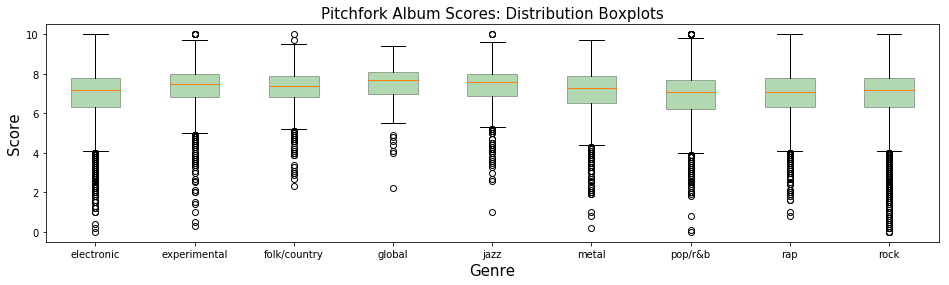

In [27]:
#create array of pf scores by genre
data = []
for genrei in pf_bygenre_df.iterrows():
    genre = genrei[0]     #gets index only out of iterrows
    data.append(pf_reviews_df[pf_reviews_df['genre'] == genre]['score'].tolist())
#plot arrray
fig2 = plt.figure(figsize = (16,4))
bp = plt.boxplot(data, patch_artist=True)    
ax = fig2.add_subplot(111)
ax = ax.set_xticklabels(pf_bygenre_df.index)
for box in bp['boxes']: #change box color
    box.set(facecolor='g', alpha=.3)
plt.ylabel('Score', fontsize=15)
plt.xlabel('Genre', fontsize=15)
plt.title('Pitchfork Album Scores: Distribution Boxplots', fontsize=15)
fig2.show()

In [10]:
#Genre standard deviations
genre_std = pf_reviews_df.groupby(['genre'])['score'].std()
genre_std.sort_values(ascending=False)

genre
metal           1.387799
rock            1.360347
electronic      1.310056
rap             1.302703
pop/r&b         1.295232
jazz            1.251104
experimental    1.106455
folk/country    1.064435
global          1.006076
Name: score, dtype: float64

While generally similar, with most scores between 6 and 8, the standard deviation for rock albums is larger (though smaller than metal).  
Pitchfork's focus is on rock music, and so I will look at rock compared to all other genres. 

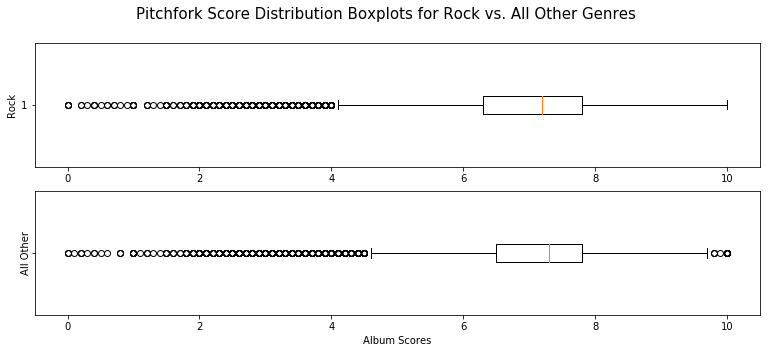

In [11]:
#plot Rock vs Other
pf_rock = pf_reviews_df[pf_reviews_df['genre'] == 'rock']
pf_nonrock = pf_reviews_df[pf_reviews_df['genre'] != 'rock']

fig3 = plt.figure(figsize=(13,5))
plt.ylabel('Score')
plt.suptitle('Pitchfork Score Distribution Boxplots for Rock vs. All Other Genres', fontsize=15)

ax1 = plt.subplot(211)
plt.boxplot(pf_rock['score'], vert=False)
plt.ylabel('Rock')

ax2 = plt.subplot(212,  sharey=ax1)
plt.boxplot(pf_nonrock['score'], vert=False)
plt.ylabel('All Other')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.xlabel('Album Scores')    
plt.show(fig3)    

These boxplots are quite similar.

### Comparison of Review Scores between Pitchfork and Fantano

I will join these two datasets to look at just those albums which both reviewers have published scores for. 

In [12]:
#create lower case Artist and Album name columns in Fantano dataframe so they can be used to join Dataframes
fantano_reviewdf['artist_lc'] = fantano_reviewdf['artist'].str.lower()
fantano_reviewdf['title_lc'] = fantano_reviewdf['title'].str.lower()

In [13]:
# join Fantano and PF datasets
Fantano_PF_intersec_df = pd.merge(fantano_reviewdf, pf_reviews_df, 
                               left_on=['artist_lc','title_lc'], right_on=['artist','title'], 
                               how='inner', suffixes=('_Fantano', '_pf'))
#remove unusued columns
Fantano_PF_intersec_df = Fantano_PF_intersec_df.drop(['Unnamed: 0', 'review_date', 'review_type', 'word_score', 
                                                      'best_tracks', 'worst_track', 'link', 'reviewid'], axis=1)
# check data is correctly joined
Fantano_PF_intersec_df.head()

,title_Fantano,artist_Fantano,score_Fantano,artist_lc,title_lc,title_pf,artist_pf,score_pf,best_new_music,genre
0,Cosmogramma,Flying Lotus,8.0,flying lotus,cosmogramma,cosmogramma,flying lotus,8.8,1,electronic
1,Latin,Holy Fuck,7.0,holy fuck,latin,latin,holy fuck,7.8,0,electronic
2,High Violet,The National,6.0,the national,high violet,high violet,the national,8.7,1,rock
3,Together,The New Pornographers,7.0,the new pornographers,together,together,the new pornographers,7.3,0,rock
4,Sea of Cowards,The Dead Weather,5.0,the dead weather,sea of cowards,sea of cowards,the dead weather,7.8,0,rock


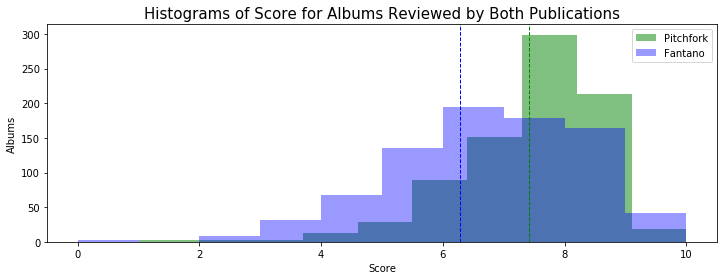

In [14]:
#plot histograms for review scores for mutually reviewed albums 
plt.figure(figsize=(12,4))
plt.hist(Fantano_PF_intersec_df['score_pf'], color='g', alpha=.5, label='Pitchfork', bins=10)
plt.axvline(Fantano_PF_intersec_df['score_pf'].mean(), color='g', linestyle='dashed', linewidth=1)

plt.hist(Fantano_PF_intersec_df['score_Fantano'], color='b', alpha=.4, label='Fantano', bins=10 )
plt.axvline(Fantano_PF_intersec_df['score_Fantano'].mean(), color='b', linestyle='dashed', linewidth=1)

plt.legend(loc='upper right')
plt.xlabel('Score')
plt.ylabel('Albums')
plt.title('Histograms of Score for Albums Reviewed by Both Publications', fontsize=15)
plt.show()

The set of albums that both have reviewed are a sample of the population of albums each has reviewed. Thus, 
These are both negative-skewed distributions. This creates a problem for comparing the distributions, as the tests assume normality. I will review the standard deviations to see if that will affect the testing. 

We can also see the Fantano scores have a more narrowly clustered distribution, which should be apparent from the standard deviations. 

In [15]:
#get basic stats for both sets of scores
Fantano_PF_intersec_df[['score_pf', 'score_Fantano']].describe()

,score_pf,score_Fantano
count,821.000000,821.000000
mean,7.407674,6.280146
std,1.169481,1.586362
min,1.000000,0.000000
25%,6.800000,5.000000
50%,7.600000,6.000000
75%,8.200000,7.000000
max,10.000000,10.000000


In [16]:
scipy.stats.ttest_ind(Fantano_PF_intersec_df['score_pf'], Fantano_PF_intersec_df['score_Fantano'])

Ttest_indResult(statistic=16.392540084192476, pvalue=4.816949713842482e-56)

##### Interpretation:
The Fantano scores are somewhat lower, with a higher standard deviation. One explantation for this would be that as a website with a number of staff reviewers, Pitchfork can assign albums to people who specialize in a style of music, and those who specialize in a style will tend to give that style higher average marks. Thus Pitchfork's scores can be considered a bias sample of the population of reviews that their staff would give the albums, if every writer reveiewed every album. 

The number of observations is quite large, so a t-test gives an approximation in this case. This p-value very small and indicates the difference between the album scores is very unlikly to be due to chance, son long as the sample is not biased.

Because of the skewness and difference in standard deviations, I chose also run a ranked sum test. 

In [17]:
scipy.stats.mannwhitneyu(Fantano_PF_intersec_df['score_pf'], Fantano_PF_intersec_df['score_Fantano'])

MannwhitneyuResult(statistic=186288.0, pvalue=3.690264676874808e-56)

The results produced similarly result in very high confidence in the result. The very low p-value means the result is not due to chance. This is helped by the large number of reviews in the intersection set. From this we can conclude that the average score that Fantano gives to albums is significantly higher than the average score pitchfork gives to albums. 

### Distribution of the difference in score for each album
We might also want to know how similar the scores are for any individual album - do the two reviewers give scores that are similar, just with a somewhat higher average for Fantano? 

Let's visualize where the scores fall for each album between the two reviewers.

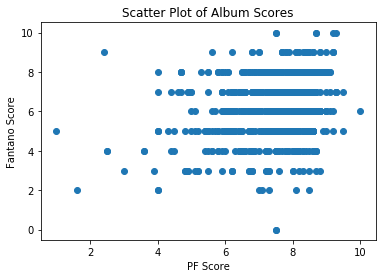

In [18]:
plt.scatter(Fantano_PF_intersec_df['score_pf'], Fantano_PF_intersec_df['score_Fantano'])
plt.ylabel('Fantano Score')
plt.xlabel('PF Score')
plt.title('Scatter Plot of Album Scores')
plt.show()

These appear to vary widely. How much does the score vary by for an typical album?

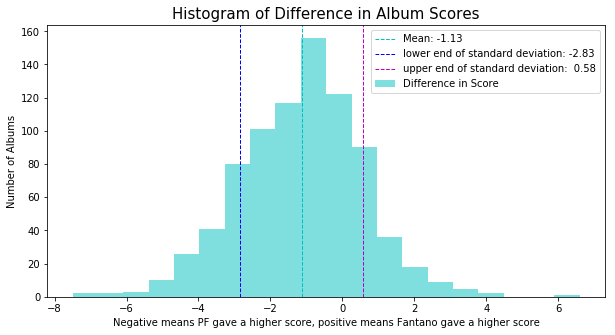

In [19]:
#create score diff df
score_diff_F_min_pf_df = Fantano_PF_intersec_df.loc[:,['artist_Fantano', 'title_Fantano']]
score_diff = Fantano_PF_intersec_df['score_Fantano'] - Fantano_PF_intersec_df['score_pf']
score_diff_F_min_pf_df['difference']= score_diff

#compute values for plot
diff_mean = score_diff_F_min_pf_df['difference'].mean()
diff_st = score_diff_F_min_pf_df['difference'].std()
diff_st_l = diff_mean - diff_st
diff_st_u = diff_mean + diff_st

#plot
plt.figure(figsize=(10,5))
plt.hist(score_diff_F_min_pf_df['difference'], color='c', alpha=.5, bins=20, label='Difference in Score')
plt.title('Histogram of Difference in Album Scores', fontsize= 15)
plt.xlabel('Negative means PF gave a higher score, positive means Fantano gave a higher score')
plt.ylabel('Number of Albums')
plt.axvline(diff_mean , color='c', linestyle='dashed', linewidth=1, label='Mean: {:5.2f}'.format(diff_mean))
plt.axvline(diff_mean - diff_st, color='b', linestyle='dashed', linewidth=1, 
            label='lower end of standard deviation: {:5.2f}'.format(diff_st_l))
plt.axvline(diff_mean + diff_st, color='m', linestyle='dashed', linewidth=1, 
            label='upper end of standard deviation: {:5.2f}'.format(diff_st_u))
plt.legend(loc='upper right')
plt.show()

The mean score given by Fantano is lower, but many albums will get a higher score from Fantano than Pitchfork. 

Let's check this is normally distributed. 

In [20]:
#create normal distribution with same size as Best New Music
normal_diff = np.random.normal(40, .1, score_diff_F_min_pf_df['difference'].count())
normal_diff.sort()

In [21]:
differences = score_diff_F_min_pf_df['difference']
differences = differences.sort_values()

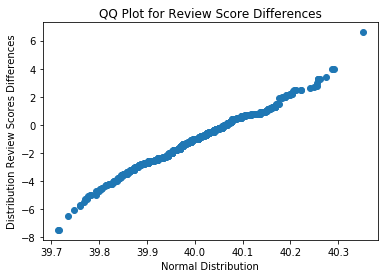

In [22]:
#plot normal distribution and Best New Music on QQ
plt.plot(normal_diff, differences, "o")
plt.xlabel('Normal Distribution')
plt.ylabel('Distribution Review Scores Differences')
plt.title('QQ Plot for Review Score Differences')
plt.show()

There are a couple of outliers, but this is close to normal.

### Pitchfork's 'Best New Music'

Pitchfork adds some of the albums that it reviews to an ongoing cumulative list call 'Best New Music'. Are the reviews scores for these albums higher than the average review? How much higher?

For this question, the reviews are considered as the population, since this is question comparing 

In [23]:
#slice best new music
pf_bnm = pf_reviews_df.loc[pf_reviews_df['best_new_music'] == 1]['score']

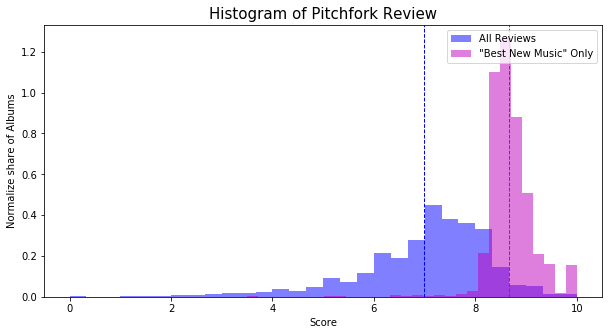

In [24]:
#plot results
plt.figure(figsize=(10,5))
plt.hist(pf_reviews_df['score'], color='b', alpha=.5, label='All Reviews', bins=30, density=True)
plt.axvline(pf_reviews_df['score'].mean(), color='b', linestyle='dashed', linewidth=1)

plt.hist(pf_bnm, color='m', alpha=.5, label='"Best New Music" Only', bins=30, density=True)
plt.axvline(pf_bnm.mean(), color='m', linestyle='dashed', linewidth=1)

plt.legend(loc='upper right')
plt.xlabel('Score')
plt.ylabel('Normalize share of Albums')
plt.title('Histogram of Pitchfork Review', fontsize=15)
plt.show()

As described above, the distribution of all reviews appears skewed. The Best New Music scores, while having a much higher mean, is a sample of all reviews and appears to be closer to normal. To test this, we will look at a Quantile-Quantile plot.

In [25]:
#create normal distribution with same size as Best New Music
normal = np.random.normal(40, .1, 1132)

#sort values
pf_bnm = pf_bnm.sort_values()
normal.sort()

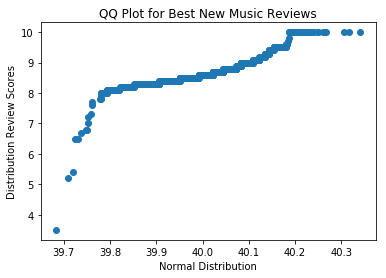

In [26]:
#plot normal distribution and Best New Music on QQ
plt.plot(normal, pf_bnm, "o")
plt.xlabel('Normal Distribution')
plt.ylabel('Distribution Review Scores')
plt.title('QQ Plot for Best New Music Reviews')
plt.show()

This diverges from a normal distribution, especially at the extreme ends of the distribution - a very few low scores, and a grouping of perfect 10 scores at the high end. This is likely due to the bounds of the scores - low scores in 'best new music' are contrary to the definition of 'Best' and very rare, and this tail is thin, until around a score of 8. The maximum score of 10 puts a hard limit on the right tail, limiting the extreme values. 

## Proposal for Additional Research

I would be interested in getting in deeper with these data sets by genre and over time. The text of the pitchfork reviews (and the video of the Fantano reviews) seem like they would be interesting to analize for how different albums are describe, including by genre and better vs worse albums. 

I also looked into another set of reviews which was originally extracted from Amazon reviews. I think it would be interesting cluster analysis to do by looking at people who positively review a given album review other albums, and if adding in profesional reviews adds anything to this. 